In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col='id')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


# Feature Types:
- Nominal: gender, hypertension, heart_disease, ever_married, work_type, residence_type, smoking_status
- Numerical: age, avg_glucose_level, bmi

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [13]:
# Check for duplicate rows
df.duplicated().sum()

0

In [14]:
# Identify syntax errors in categorical data
pd.options.display.max_rows = 999
data_types = df.dtypes
str_cols = data_types[data_types == 'object'].index

for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False)) # No errors
    print('\n\n')

- gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



- ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64



- work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



- Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64



- smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64





In [15]:
# Identify errors in numerical data
df.describe() # No errors

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
# Address missing values

# bmi is a numerical feature -> can impute mean or median
# median is imputed to reduce the effect of outliers
median_bmi = df['bmi'].median()
df['bmi'].fillna(value=median_bmi, inplace=True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

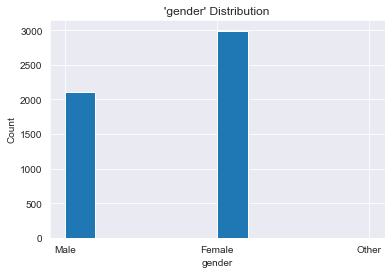

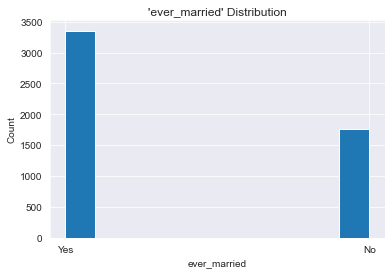

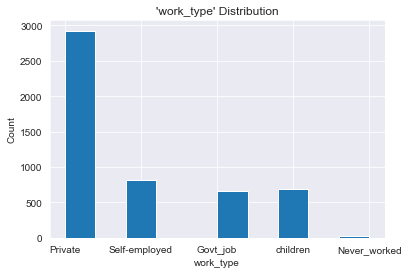

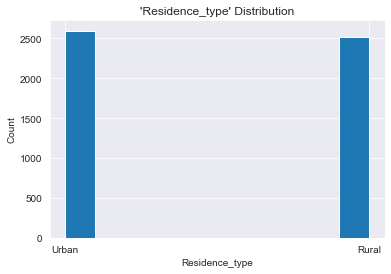

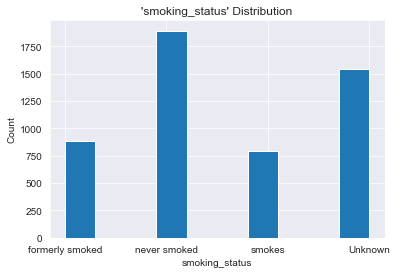

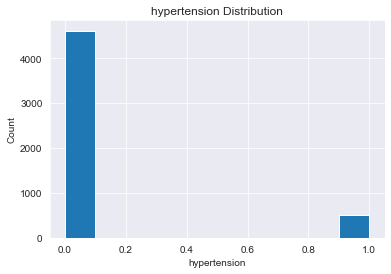

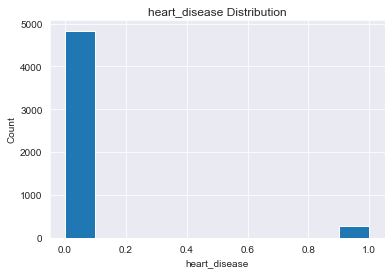

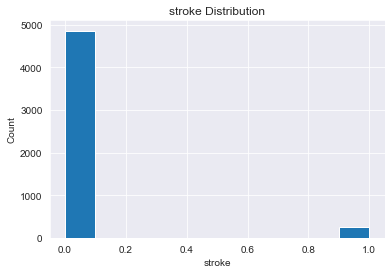

In [17]:
# View distributions of categorical features
sns.set_style('darkgrid')
for col in str_cols:
    df[f'{col}'].hist()
    plt.title(f"'{col}' Distribution")
    plt.ylabel('Count')
    plt.xlabel(f'{col}')
    plt.show()

df['hypertension'].hist()
plt.title("hypertension Distribution")
plt.ylabel('Count')
plt.xlabel('hypertension')
plt.show()

df['heart_disease'].hist()
plt.title("heart_disease Distribution")
plt.ylabel('Count')
plt.xlabel('heart_disease')
plt.show()

df['stroke'].hist()
plt.title("stroke Distribution")
plt.ylabel('Count')
plt.xlabel('stroke')
plt.show()

Few samples of patients with hypertension, heart_disease, or stroke are present

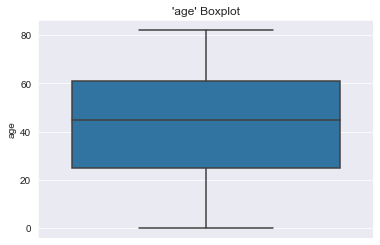

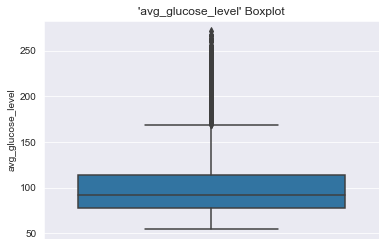

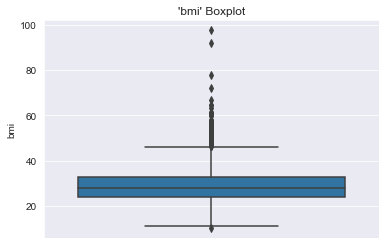

In [18]:
# View distributions of numerical features
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    sns.boxplot(data=df, y=col)
    plt.title(f"'{col}' Boxplot")
    plt.show()

'avg_glucose_level' and 'bmi' contain many outliers